# Causal interpretability for Software Engineering 

## Introduction Interpretability for SE

What is Interpretability for SE?

## Case of study

### Correlation analysis??

### Causal analysis

You can download SEMERU datasets at  https://huggingface.co/semeru

### Preliminaries - Input Software Data

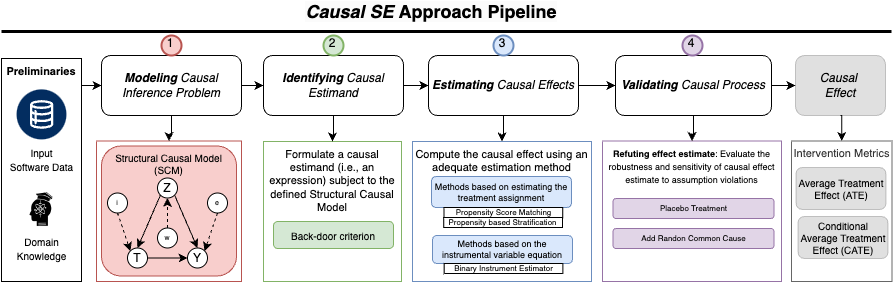

In [14]:
from datasets import load_dataset
import pandas as pd

In [15]:
dataset = "semeru/causal-se"
data_files="treatments.parquet"

In [16]:
dataset = load_dataset(dataset, cache_dir="../../datax", revision="main", data_files=data_files )

Generating train split: 8769 examples [00:00, 122074.18 examples/s]


In [17]:
dataset.set_format(type='pandas')

In [18]:
treatments_df = dataset['train'][:]

In [19]:
documentation_df = pd.concat([treatments_df['id'], treatments_df['code'], treatments_df['documentation'].apply(pd.Series)], axis=1)
documentation_df

,id,code,docstring,language,n_whitespaces,n_words,vocab_size
0,167770,"def rolling(self, *args, **kwargs) -> RollingG...","\n Return a rolling grouper, providing ...",en,24,9,8
1,176730,"def expected_degree_graph(w, seed=None, selflo...",Returns a random graph with given expected deg...,en,524,298,173
2,19151,"def save(self, path):\n \n os.ma...",Write the evaluation results to the specified ...,en,9,10,9
3,89933,def test_build_group_generic_issue_attachment(...,Test that a generic issue type's Slack alert c...,en,11,12,12
4,179114,"def apply(self, func, mask=None) -> 'ImageProc...",\n apply your own function on internal ...,en,79,31,30
...,...,...,...,...,...,...,...
8764,67430,"def get_data(conditions, filters):\n\tdata = f...",\n\t\tSELECT\n\t\t\tso.transaction_date as dat...,en,112,146,102
8765,218391,def getcoroutinelocals(coroutine):\n \n ...,\n Get the mapping of coroutine local varia...,en,36,27,22
8766,272189,"def _forward_over_back_hessian(f, params, use_...",Computes the full Hessian matrix for the scala...,en,166,105,73
8767,259605,"def predict_proba(self, X):\n \n ...",Probability estimates.\n\n This method ...,en,339,138,98


Create each treatment dataset $t\in T$.

- Control template: "Complete the following python method: ```{Random_cut code}```",
- Treatment 1 (T1): "Write a Python method that starts with ```{Function Name}``` , I need to complete this function. Remove comments, summary and descriptions.",
- Treatment 2 (T2): "Remeber you have a Python function named ```{Method Signature}```, the function starts with the following code ```{Random_cut code}```. The description for the function is: ```{docstring}``` remove comments; remove summary; remove description; Return only the code"

In [20]:
treatments_df.columns.tolist()

['commit_id',
 'code',
 'repo',
 'documentation',
 'id',
 'w_n_ast_errors',
 'w_ast_errors',
 'w_vocab_size',
 'd_id',
 'commit_message',
 'fun_name',
 'w_n_identifiers',
 'w_nloc',
 'random_cut',
 'w_n_ast_nodes',
 'w_token_counts',
 'file_name',
 'path',
 'w_complexity',
 'w_n_words',
 'w_ast_levels',
 'url',
 'language',
 'w_n_whitespaces',
 'e_n_whitespaces',
 'e_n_words',
 'prediction',
 'e_vocab_size',
 'i_n_whitespaces',
 'i_n_words',
 'template',
 'i_vocab_size',
 'binary_treatment',
 'treatment',
 'y_po_lev']

In [21]:
treatments_df.head()

,commit_id,code,repo,documentation,id,w_n_ast_errors,w_ast_errors,w_vocab_size,d_id,commit_message,...,e_n_words,prediction,e_vocab_size,i_n_whitespaces,i_n_words,template,i_vocab_size,binary_treatment,treatment,y_po_lev
0,f65417656ba8c59438d832b6e2a431f78d40c21c,"def rolling(self, *args, **kwargs) -> RollingG...",pandas,{'docstring': ' Return a rolling group...,167770,0,,17,40113,TYP: more return annotations in core/ (#47618)...,...,72,Certainly! Here's the completed code:\n\n```py...,53,29,16,Complete the following python method: ```{}```,16,False,control,364
1,2a05ccdb07cff88e56661dee8a9271859354027f,"def expected_degree_graph(w, seed=None, selflo...",networkx,{'docstring': 'Returns a random graph with giv...,176730,0,,97,42064,Remove redundant py2 numeric conversions (#566...,...,332,Here is the completed python method:\n\n```pyt...,182,380,175,Complete the following python method: ```{}```,100,False,control,926
2,4c58179509e6f6047789efb0a95c2b0e20cb6c8f,"def save(self, path):\n \n os.ma...",mlflow,{'docstring': 'Write the evaluation results to...,19151,0,,36,2897,Improve evaluation api (#5256)\n\n* init\r\n\r...,...,1,exist_ok=True),1,23,9,Complete the following python method: ```{}```,9,False,control,771
3,3255fa4ebb9fbc1df6bb063c0eb77a0298ca8f72,def test_build_group_generic_issue_attachment(...,sentry,{'docstring': 'Test that a generic issue type'...,89933,0,,38,18592,feat(integrations): Support generic issue type...,...,1,"""danger""",1,152,50,Complete the following python method: ```{}```,38,False,control,835
4,b3bc4e734528d3b186c3a38a6e73e106c3555cc7,"def apply(self, func, mask=None) -> 'ImageProc...",DeepFaceLive,{'docstring': ' apply your own functio...,179114,0,,34,42906,ImageProcessor.py refactoring,...,32,```\n mask = mask.astype(bool)\n ...,28,86,38,Complete the following python method: ```{}```,34,False,control,302


## Levenshtein normalization

In [24]:
column_to_normalize = 'y_po_lev'


In [34]:
min_value = treatments_df[column_to_normalize].values.min()
max_value = treatments_df[column_to_normalize].values.max()

In [26]:
treatments_df['y_po_lev_norm'] = (treatments_df[column_to_normalize] - min_value) / (max_value - min_value)


In [35]:
treatments_df

,commit_id,code,repo,documentation,id,w_n_ast_errors,w_ast_errors,w_vocab_size,d_id,commit_message,...,prediction,e_vocab_size,i_n_whitespaces,i_n_words,template,i_vocab_size,binary_treatment,treatment,y_po_lev,y_po_lev_norm
0,f65417656ba8c59438d832b6e2a431f78d40c21c,"def rolling(self, *args, **kwargs) -> RollingG...",pandas,{'docstring': ' Return a rolling group...,167770,0,,17,40113,TYP: more return annotations in core/ (#47618)...,...,Certainly! Here's the completed code:\n\n```py...,53,29,16,Complete the following python method: ```{}```,16,False,control,364,0.029567
1,2a05ccdb07cff88e56661dee8a9271859354027f,"def expected_degree_graph(w, seed=None, selflo...",networkx,{'docstring': 'Returns a random graph with giv...,176730,0,,97,42064,Remove redundant py2 numeric conversions (#566...,...,Here is the completed python method:\n\n```pyt...,182,380,175,Complete the following python method: ```{}```,100,False,control,926,0.075217
2,4c58179509e6f6047789efb0a95c2b0e20cb6c8f,"def save(self, path):\n \n os.ma...",mlflow,{'docstring': 'Write the evaluation results to...,19151,0,,36,2897,Improve evaluation api (#5256)\n\n* init\r\n\r...,...,exist_ok=True),1,23,9,Complete the following python method: ```{}```,9,False,control,771,0.062627
3,3255fa4ebb9fbc1df6bb063c0eb77a0298ca8f72,def test_build_group_generic_issue_attachment(...,sentry,{'docstring': 'Test that a generic issue type'...,89933,0,,38,18592,feat(integrations): Support generic issue type...,...,"""danger""",1,152,50,Complete the following python method: ```{}```,38,False,control,835,0.067826
4,b3bc4e734528d3b186c3a38a6e73e106c3555cc7,"def apply(self, func, mask=None) -> 'ImageProc...",DeepFaceLive,{'docstring': ' apply your own functio...,179114,0,,34,42906,ImageProcessor.py refactoring,...,```\n mask = mask.astype(bool)\n ...,28,86,38,Complete the following python method: ```{}```,34,False,control,302,0.024531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8764,494bd9ef78313436f0424b918f200dab8fc7c20b,"def get_data(conditions, filters):\n\tdata = f...",erpnext,{'docstring': ' SELECT so.transaction_dat...,67430,0,,13,14521,style: format code with black,...,"Sure! Here's the code without the comments, su...",122,148,188,"Remeber you have a Python function named {}, t...",134,True,T2,1779,0.144505
8765,8198943edd73a363c266633e1aa5b2a9e9c9f526,def getcoroutinelocals(coroutine):\n \n ...,XX-Net,{'docstring': ' Get the mapping of corouti...,218391,0,,33,55277,add python 3.10.4 for windows,...,Certainly! Here's the code for the `getcorouti...,41,112,83,"Remeber you have a Python function named {}, t...",65,True,T2,589,0.047843
8766,84afc5193d38057e2e2badf9c889ea87d80d8fbf,"def _forward_over_back_hessian(f, params, use_...",keras,{'docstring': 'Computes the full Hessian matri...,272189,0,,13,80975,Reformatting the codebase with black.\n\nPiper...,...,Sure! Here's the code for the `_forward_over_b...,65,243,150,"Remeber you have a Python function named {}, t...",104,True,T2,552,0.044838
8767,0c20ba744966d23ede67cffd7c5d2e0d01cd0658,"def predict_proba(self, X):\n \n ...",scikit-learn,{'docstring': 'Probability estimates. ...,259605,0,,85,75837,"DEP loss ""log"" in favor of ""log loss"" in SGDCl...",...,"Certainly! Here's the code without comments, s...",78,846,274,"Remeber you have a Python function named {}, t...",180,True,T2,631,0.051255


Treatmens are the prompt configuration used as input

- T0, Control template: "Complete the following python method: ```{Random_cut code}```",
- T1, Treatment 1: "Write a Python method that starts with ```{Function Name}``` , I need to complete this function. Remove comments, summary and descriptions.",
- T2, Treatment 2: "Remeber you have a Python function named ```{Method Signature}```, the function starts with the following code ```{Random_cut code}```. The description for the function is: ```{docstring}``` remove comments; remove summary; remove description; Return only the code"

Potential outcomes:

Potential outcomes $Y^t$: Levenshtaien distance (code predicion, groundtruth), $t\in T$

Common causes are the code snippet grountruth metrics 
- w_ast_levels 
- w_n_whitespaces
- w_complexity
- w_nloc
- w_token_counts
- w_n_ast_nodes

Common causes affect both treatments $T$ and potential outcomes $Y$

Instrumental variables: Are the Software Engineering input put prompt metrics

- i_p_n_words
- i_n_whitespaces
- i_vocab_size 

Effect modifiers: Are the software engineering potential outcome metrics
- e_p_n_words
- e_n_whitespaces
- e_vocab_size 

In [36]:
import seaborn as sns


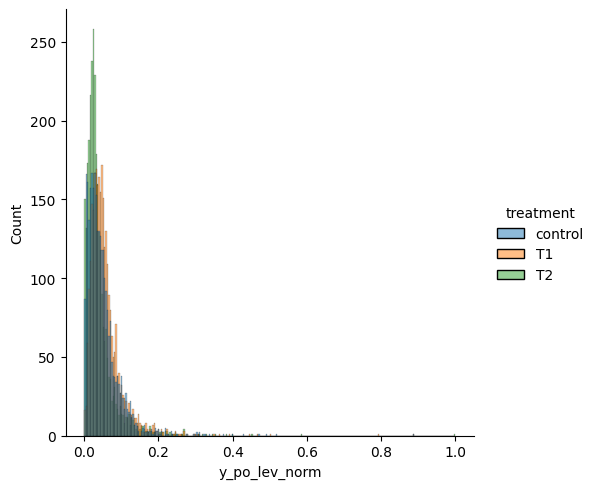

In [37]:
sns.displot(treatments_df, x="y_po_lev_norm", hue="treatment")

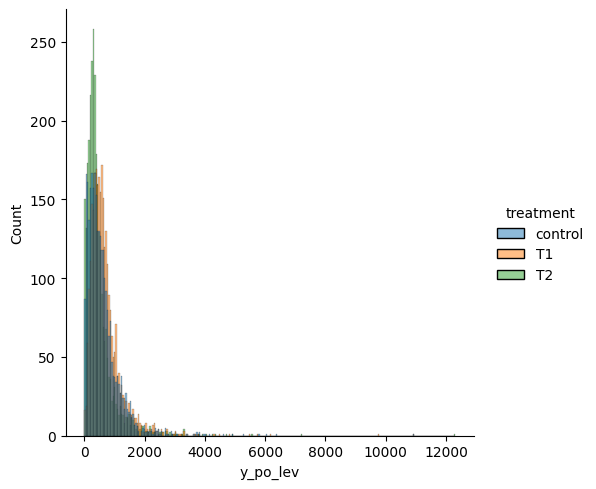

In [38]:
sns.displot(treatments_df, x="y_po_lev", hue="treatment")

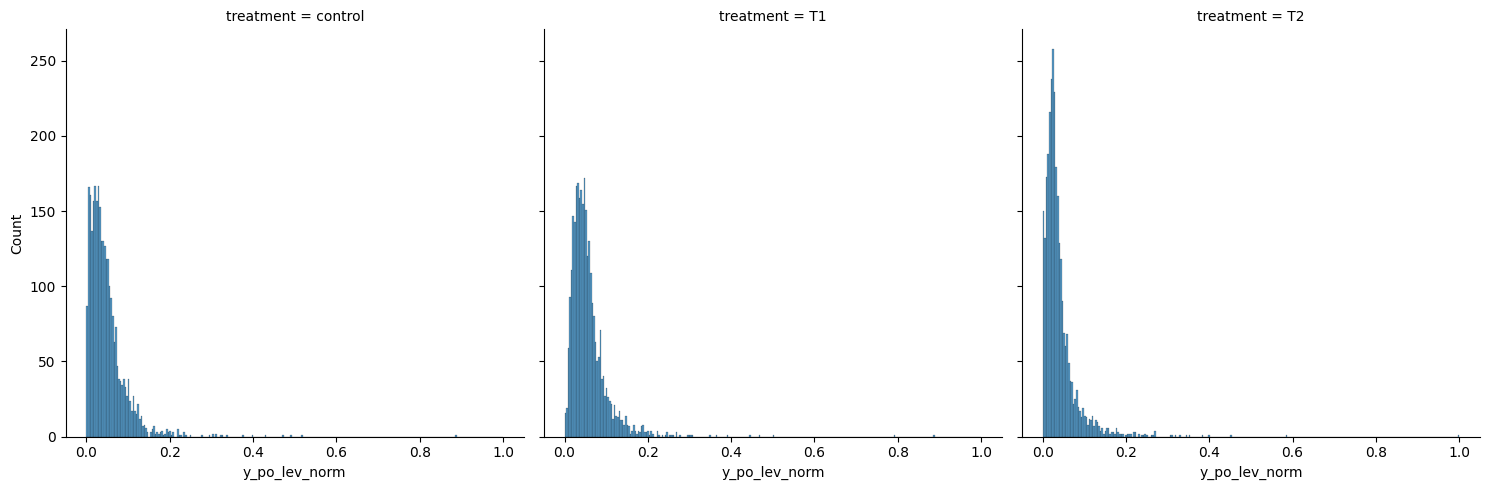

In [39]:
sns.displot(treatments_df, x="y_po_lev_norm", col="treatment")

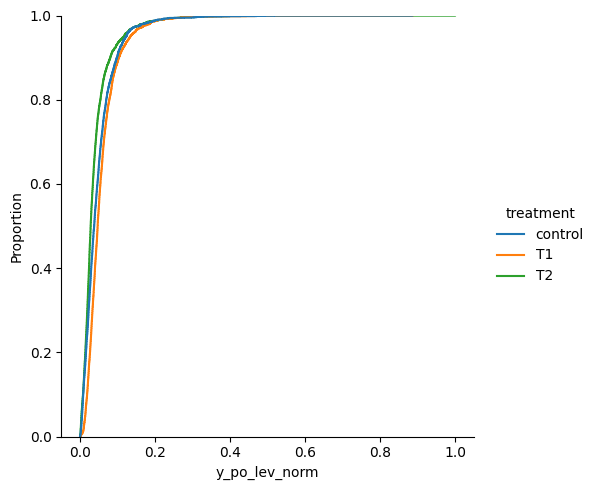

In [40]:
sns.displot(treatments_df, x="y_po_lev_norm", hue="treatment", kind="ecdf")

<Axes: xlabel='treatment', ylabel='y_po_lev_norm'>

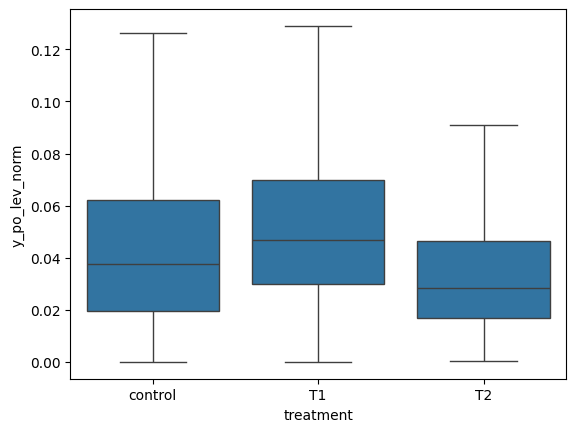

In [41]:
sns.boxplot(data=treatments_df[['y_po_lev_norm','treatment']], x="treatment", y="y_po_lev_norm",showfliers=False)


In [43]:
treatments_df[['y_po_lev','treatment']].groupby('treatment').describe()

y_po_lev                                                           
             count        mean         std  min    25%    50%    75%      max
treatment                                                                    
T1          2923.0  703.023948  581.868063  0.0  369.5  577.0  857.5  10919.0
T2          2923.0  490.223401  556.738150  4.0  205.5  349.0  571.5  12311.0
control     2923.0  591.967157  574.681895  0.0  243.0  464.0  767.5  10913.0

In [42]:
treatments_df[['y_po_lev','binary_treatment']].groupby('binary_treatment').describe()

y_po_lev                                                    \
                    count        mean         std  min    25%    50%    75%   
binary_treatment                                                              
False              2923.0  591.967157  574.681895  0.0  243.0  464.0  767.5   
True               5846.0  596.623674  579.250708  0.0  272.0  456.0  740.0   

                           
                      max  
binary_treatment           
False             10913.0  
True              12311.0

Explain metric granularity, in this case we are using sample granularity. CodeBLEU is a dataset level.

The more input prompt size is close to the GT, the less distance outcome, gt

We expect the following behavior in continues treatments: The more difference lev difference between prompts (i.e. control vs T1, T1 vs T2), the less difference at the potential outcome. We expect a negative correlations or causal effect

In [48]:
import numpy as np

from dowhy import CausalModel
import dowhy.datasets

- Binary
- Continuos
- Instrumental 

### Variable description

## Comparing Treatment_1 Vs. Control

In [44]:
treatment1 = treatments_df[(treatments_df["treatment"]=="control") | (treatments_df["treatment"]=="T1") ].copy()

## Basic comon causes model for Treatment_1

### Step-2 Causal graph modeling

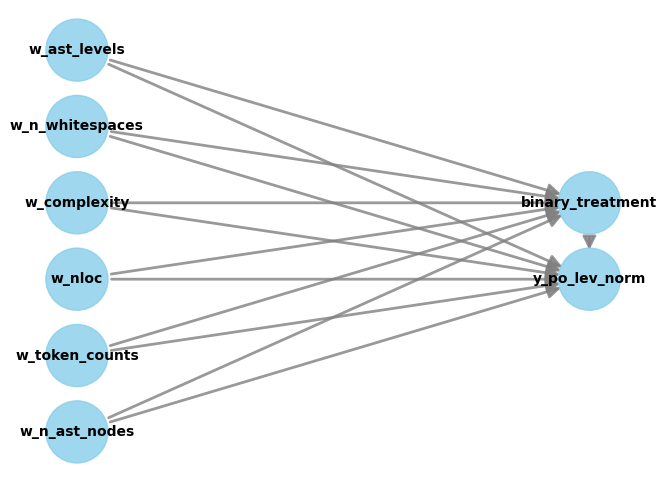

In [52]:
m1 = CausalModel(
        data = treatment1,
        treatment = ['binary_treatment'],
        outcome = ['y_po_lev_norm'],
        common_causes = ['w_ast_levels','w_n_whitespaces','w_complexity','w_nloc','w_token_counts','w_n_ast_nodes']
        #instruments = ['i_vocab_size']
        #graph= "diagram.dot"
        #common_causes= ['z_nloc']
    )
m1.view_model()

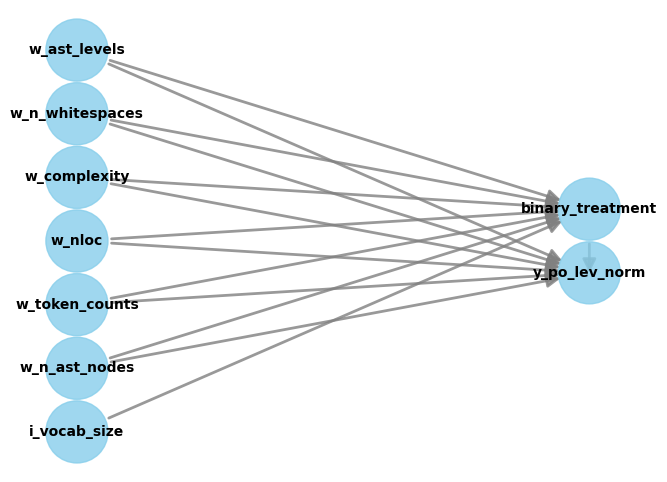

In [53]:
m2 = CausalModel(
        data = treatment1,
        treatment = ['binary_treatment'],
        outcome = ['y_po_lev_norm'],
        common_causes = ['w_ast_levels','w_n_whitespaces','w_complexity','w_nloc','w_token_counts','w_n_ast_nodes'],
        instruments = ['i_vocab_size']
        #graph= "diagram.dot"
        #common_causes= ['z_nloc']
    )
m2.view_model()

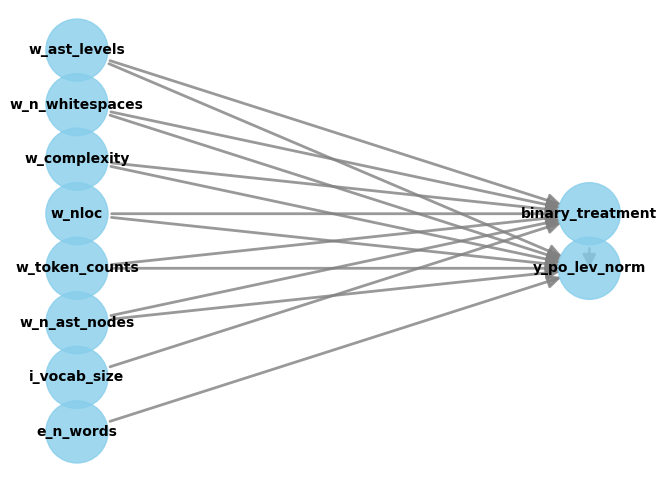

In [56]:
m3 = CausalModel(
        data = treatment1,
        treatment = ['binary_treatment'],
        outcome = ['y_po_lev_norm'],
        common_causes = ['w_ast_levels','w_n_whitespaces','w_complexity','w_nloc','w_token_counts','w_n_ast_nodes'],
        instruments = ['i_vocab_size'],
        effect_modifiers=['e_n_words']
        #graph= "diagram.dot"
        #common_causes= ['z_nloc']
    )
m3.view_model()

### Step-2 Identifiying Causal Estimand

In [54]:
identified_estimand_m1 = m1.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand_m1)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
──────────────────(E[y_po_lev_norm|w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_
d[binaryₜᵣₑₐₜₘₑₙₜ]                                                            

                                    
levels,w_token_counts,w_complexity])
                                    
Estimand assumption 1, Unconfoundedness: If U→{binary_treatment} and U→y_po_lev_norm then P(y_po_lev_norm|binary_treatment,w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_levels,w_token_counts,w_complexity,U) = P(y_po_lev_norm|binary_treatment,w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_levels,w_token_counts,w_complexity)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [55]:
identified_estimand_m2 = m2.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand_m2)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
──────────────────(E[y_po_lev_norm|w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_
d[binaryₜᵣₑₐₜₘₑₙₜ]                                                            

                                    
levels,w_token_counts,w_complexity])
                                    
Estimand assumption 1, Unconfoundedness: If U→{binary_treatment} and U→y_po_lev_norm then P(y_po_lev_norm|binary_treatment,w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_levels,w_token_counts,w_complexity,U) = P(y_po_lev_norm|binary_treatment,w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_levels,w_token_counts,w_complexity)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                                                  -1⎤
 ⎢       d                      ⎛       d                          ⎞  ⎥
E⎢───────────────(yₚₒ ₗ

In [57]:
identified_estimand_m3 = m3.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand_m3)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
──────────────────(E[y_po_lev_norm|w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_
d[binaryₜᵣₑₐₜₘₑₙₜ]                                                            

                                    
levels,w_token_counts,w_complexity])
                                    
Estimand assumption 1, Unconfoundedness: If U→{binary_treatment} and U→y_po_lev_norm then P(y_po_lev_norm|binary_treatment,w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_levels,w_token_counts,w_complexity,U) = P(y_po_lev_norm|binary_treatment,w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_levels,w_token_counts,w_complexity)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                                                  -1⎤
 ⎢       d                      ⎛       d                          ⎞  ⎥
E⎢───────────────(yₚₒ ₗ

### Step-3 Causal effect estimation

In [60]:
estimate_m1_1 = m1.estimate_effect(identified_estimand_m1,
        method_name="backdoor.propensity_score_matching", test_significance=True)

print(estimate_m1_1)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
──────────────────(E[y_po_lev_norm|w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_
d[binaryₜᵣₑₐₜₘₑₙₜ]                                                            

                                    
levels,w_token_counts,w_complexity])
                                    
Estimand assumption 1, Unconfoundedness: If U→{binary_treatment} and U→y_po_lev_norm then P(y_po_lev_norm|binary_treatment,w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_levels,w_token_counts,w_complexity,U) = P(y_po_lev_norm|binary_treatment,w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_levels,w_token_counts,w_complexity)

## Realized estimand
b: y_po_lev_norm~binary_treatment+w_n_ast_nodes+w_nloc+w_n_whitespaces+w_ast_levels+w_token_counts+w_complexity
Target units: ate

## Estimate
Mean value:

In [61]:
estimate_m1_2 = m1.estimate_effect(identified_estimand_m1,
        method_name="backdoor.propensity_score_stratification", test_significance=True)

print(estimate_m1_2)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
──────────────────(E[y_po_lev_norm|w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_
d[binaryₜᵣₑₐₜₘₑₙₜ]                                                            

                                    
levels,w_token_counts,w_complexity])
                                    
Estimand assumption 1, Unconfoundedness: If U→{binary_treatment} and U→y_po_lev_norm then P(y_po_lev_norm|binary_treatment,w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_levels,w_token_counts,w_complexity,U) = P(y_po_lev_norm|binary_treatment,w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_levels,w_token_counts,w_complexity)

## Realized estimand
b: y_po_lev_norm~binary_treatment+w_n_ast_nodes+w_nloc+w_n_whitespaces+w_ast_levels+w_token_counts+w_complexity
Target units: ate

## Estimate
Mean value:

In [62]:
estimate_m1_3 = m1.estimate_effect(identified_estimand_m1,
        method_name="backdoor.propensity_score_weighting", test_significance=True)

print(estimate_m1_3)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
──────────────────(E[y_po_lev_norm|w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_
d[binaryₜᵣₑₐₜₘₑₙₜ]                                                            

                                    
levels,w_token_counts,w_complexity])
                                    
Estimand assumption 1, Unconfoundedness: If U→{binary_treatment} and U→y_po_lev_norm then P(y_po_lev_norm|binary_treatment,w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_levels,w_token_counts,w_complexity,U) = P(y_po_lev_norm|binary_treatment,w_n_ast_nodes,w_nloc,w_n_whitespaces,w_ast_levels,w_token_counts,w_complexity)

## Realized estimand
b: y_po_lev_norm~binary_treatment+w_n_ast_nodes+w_nloc+w_n_whitespaces+w_ast_levels+w_token_counts+w_complexity
Target units: ate

## Estimate
Mean value:

In [59]:
estimate_m2 = m2.estimate_effect(identified_estimand_m2,
        method_name="iv.instrumental_variable", test_significance=True)

print(estimate_m2)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: iv
Estimand expression:
 ⎡                                                                  -1⎤
 ⎢       d                      ⎛       d                          ⎞  ⎥
E⎢───────────────(yₚₒ ₗₑᵥ ₙₒᵣₘ)⋅⎜───────────────([binaryₜᵣₑₐₜₘₑₙₜ])⎟  ⎥
 ⎣d[i_vocab_size]               ⎝d[i_vocab_size]                   ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y_po_lev_norm then ¬(U →→{i_vocab_size})
Estimand assumption 2, Exclusion: If we remove {i_vocab_size}→{binary_treatment}, then ¬({i_vocab_size}→y_po_lev_norm)

## Realized estimand
Realized estimand: Wald Estimator
Realized estimand type: EstimandType.NONPARAMETRIC_ATE
Estimand expression:
 ⎡      d                    ⎤  -1⎡      d                       ⎤
E⎢─────────────(yₚₒ ₗₑᵥ ₙₒᵣₘ)⎥⋅E  ⎢─────────────(binaryₜᵣₑₐₜₘₑₙₜ)⎥
 ⎣di_vocab_size              ⎦    ⎣di_vocab_size                 ⎦
Estimand assumption 1, As

### Step-4 Validation

In [72]:
validaton_placebo_cause_m1_1 = m1.refute_estimate(
                identified_estimand_m1,
                estimate_m1_1,
                method_name="placebo_treatment_refuter",
                placebo_type="permute"
        )
print(validaton_placebo_cause_m1_1)

Refute: Use a Placebo Treatment
Estimated effect:0.00845003618585755
New effect:0.001495977510440241
p value:0.8



In [71]:
validaton_random_cause_m1_1 = m1.refute_estimate(
                identified_estimand_m1,
                estimate_m1_1,
                method_name="random_common_cause",
                placebo_type="permute"
        )
print(validaton_random_cause_m1_1)

Refute: Add a random common cause
Estimated effect:0.00845003618585755
New effect:0.00845003618585755
p value:1.0



In [73]:
validaton_placebo_cause_m1_2 = m1.refute_estimate(
                identified_estimand_m1,
                estimate_m1_2,
                method_name="placebo_treatment_refuter",
                placebo_type="permute"
        )
print(validaton_placebo_cause_m1_2)

Refute: Use a Placebo Treatment
Estimated effect:0.009020939888569841
New effect:-0.00010959994973468591
p value:0.88



In [74]:
validaton_random_cause_m1_2 = m1.refute_estimate(
                identified_estimand_m1,
                estimate_m1_2,
                method_name="random_common_cause",
                placebo_type="permute"
        )
print(validaton_random_cause_m1_1)

Refute: Add a random common cause
Estimated effect:0.00845003618585755
New effect:0.00845003618585755
p value:1.0



In [75]:
validaton_placebo_cause_m1_3 = m1.refute_estimate(
                identified_estimand_m1,
                estimate_m1_3,
                method_name="placebo_treatment_refuter",
                placebo_type="permute"
        )
print(validaton_placebo_cause_m1_2)

Refute: Use a Placebo Treatment
Estimated effect:0.009020939888569841
New effect:-0.00010959994973468591
p value:0.88



In [76]:
validaton_random_cause_m1_3 = m1.refute_estimate(
                identified_estimand_m1,
                estimate_m1_3,
                method_name="random_common_cause",
                placebo_type="permute"
        )
print(validaton_random_cause_m1_3)

Refute: Add a random common cause
Estimated effect:0.009020939888569827
New effect:0.009020939888569827
p value:1.0



In [77]:
validaton_placebo_cause_m2 = m2.refute_estimate(
                identified_estimand_m2,
                estimate_m2,
                method_name="placebo_treatment_refuter",
                placebo_type="permute"
        )
print(validaton_placebo_cause_m2)

Refute: Use a Placebo Treatment
Estimated effect:0.13918999545981528
New effect:0.001085531385959097
p value:0.7



In [78]:
validaton_random_cause_m2 = m2.refute_estimate(
                identified_estimand_m2,
                estimate_m2,
                method_name="random_common_cause",
                placebo_type="permute"
        )
print(validaton_random_cause_m2)

Refute: Add a random common cause
Estimated effect:0.13918999545981528
New effect:0.1391899954598153
p value:1.0



### Brainstorming ideas

Developer experience,
Demographic info
machine generated? 
Is a code debug?

- [] dependent and independent cofounders
- [ ] compute cofounders correlation

- Model parameters
- Loss prediction
- Sampling
